In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
from collections import Counter

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')
def read_reviews_from_excel(file_path):
    df = pd.read_excel(file_path)
    reviews = df['text'].tolist()
    return reviews
def extract_features(reviews):
    stop_words = set(stopwords.words('english'))
    features = Counter()

    for review in reviews:
        # Tokenize and POS tag the words in the review
        if pd.isna(review):
            continue  # Skip NaN values
        review = str(review)  # Ensure the review is a string
        # Tokenize and POS tag the words in the review
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)


        # Extract bi-grams and filter based on POS patterns
        bi_grams = list(nltk.bigrams(tagged_tokens))
        for (w1, t1), (w2, t2) in bi_grams:
            if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('NN')):
                if w1 not in stop_words and w2 not in stop_words:
                    feature = f"{w1} {w2}"
                    features[feature] += 1

    # Filter features to retain only those with a significant occurrence
    threshold = len(reviews) * 0.00040  # 10% of the number of reviews
    significant_features = {feature: count for feature, count in features.items() if count >= threshold}
    return significant_features

# Example usage

file_path = '/content/main_sheet.xlsx'
reviews = read_reviews_from_excel(file_path)
features = extract_features(reviews)
print("Extracted Features:", features)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Extracted Features: {'perfect audio': 2, 'software products': 2, 'great price': 63, 'touch screen': 94, 'quickest computer': 2, 'light weight': 104, 'hot spot/bluetooth': 2, 'good minute': 2, 'refurbished bc': 2, 'hard drive': 93, 'mid-level graphics': 2, 'graphics card': 11, 'access work': 2, 'work files': 2, 'general computer': 3, 'last system': 2, 'refurb/open box': 2, 'box lenovo': 2, 'lenovo ideapad': 2, 'bestbuy outlet': 2, 'last december': 2, 'manufacture date': 3, 'bb lenovo': 2, 'chinese water': 2, 'water torture': 2, '2-5 minutes': 3, 'shopping.this system': 2, 'good storage': 4, 'enough pix': 2, 'major step': 2, 'computer is.yay.i': 2, 'gamer desktop': 2, 'see aboveplus': 2, 'card slot': 27, 'good thing': 10, 'cd/dvd tray': 2, 'camera cover/lock': 2, 'little paper': 2, 'usb ports': 43, 'desktop system': 4, 'system monitors': 2, 'last laptop': 2, 'disc tray': 2, 'sd card': 32, 'thumb drive': 4, 'please note': 2, 'geeky/gamer heart': 2, 'hd space': 2, 'minimal ports': 3, 'deal

In [ ]:
len(features)/80


33.6125

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def evaluate_feature_sentiment(reviews, features):
    sia = SentimentIntensityAnalyzer()
    feature_sentiments = {feature: [] for feature in features}

    for review in reviews:
        if pd.isna(review):
            continue  # Skip NaN values
        review = str(review)  # Ensure the review is a string
        # Tokenize and POS tag the words in the review
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)
        for feature in features:
            if feature in review.lower():
                # Get sentiment score for the sentence containing the feature
                sentiment_score = sia.polarity_scores(review)
                feature_sentiments[feature].append(sentiment_score['compound'])

    # Aggregate sentiment scores for each feature
    aggregated_sentiments = {}
    for feature, scores in feature_sentiments.items():
        if scores:
            average_score = sum(scores) / len(scores)
            aggregated_sentiments[feature] = average_score
        else:
            aggregated_sentiments[feature] = 0  # Neutral if no data

    return aggregated_sentiments

# Using the previously extracted features
sentiments = evaluate_feature_sentiment(reviews, features)
print("Feature Sentiments:", sentiments)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Feature Sentiments: {'battery life': 0.5524328358208955}


In [ ]:
import pandas as pd
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def extract_features(reviews):
    stop_words = set(stopwords.words('english'))
    unigram_features = Counter()
    bigram_features = Counter()

    for review in reviews:
        # Tokenize and POS tag the words in the review
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)

        # Extract unigrams
        for word, tag in tagged_tokens:
            if tag.startswith('NN') and word not in stop_words:
                unigram_features[word] += 1

        # Extract bigrams and filter based on POS patterns
        bi_grams = list(nltk.bigrams(tagged_tokens))
        for (w1, t1), (w2, t2) in bi_grams:
            if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('NN')):
                if w1 not in stop_words and w2 not in stop_words:
                    feature = f"{w1} {w2}"
                    bigram_features[feature] += 1

    # Filter features to retain only those with a significant occurrence
    threshold = len(reviews) * 0.03
    threshold1 = len(reviews) * 0.3
      # 10% of the number of reviews
    significant_unigrams = {feature: count for feature, count in unigram_features.items() if count >= threshold1}
    significant_bigrams = {feature: count for feature, count in bigram_features.items() if count >= threshold}

    # Create DataFrame with different list lengths
    max_len = max(len(significant_unigrams), len(significant_bigrams))
    unigram_list = list(significant_unigrams.keys()) + [None] * (max_len - len(significant_unigrams))
    bigram_list = list(significant_bigrams.keys()) + [None] * (max_len - len(significant_bigrams))

    df = pd.DataFrame({
        'Unigram Features': unigram_list,
        'Bigram Features': bigram_list
    })

    return df

# Example usage


features_df = extract_features(reviews)
print("Extracted Features DataFrame:")
print(features_df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracted Features DataFrame:
   Unigram Features     Bigram Features
0            laptop          hard drive
1          keyboard        memory stick
2            screen          number pad
3             price  keyboard backlight
4            memory       budget laptop
5             drive            next day
6              mode           touch pad
7           windows        power button
8              time           usb ports
9              work        battery life
10         computer      computer needs
11             acer         acer laptop
12          battery         price point
13              ram         acer aspire
14             None                 * *
15             None    operating system
16             None    backlit keyboard
17             None           track pad
18             None         price range
19             None           ssd drive
20             None   microsoft account
21             None         great price
22             None        touch screen
23        

In [ ]:
features_df.head(87)

,Unigram Features,Bigram Features
0,laptop,hard drive
1,keyboard,memory stick
2,screen,number pad
3,price,keyboard backlight
4,memory,budget laptop
5,drive,next day
6,mode,touch pad
7,windows,power button
8,time,usb ports
9,work,battery life


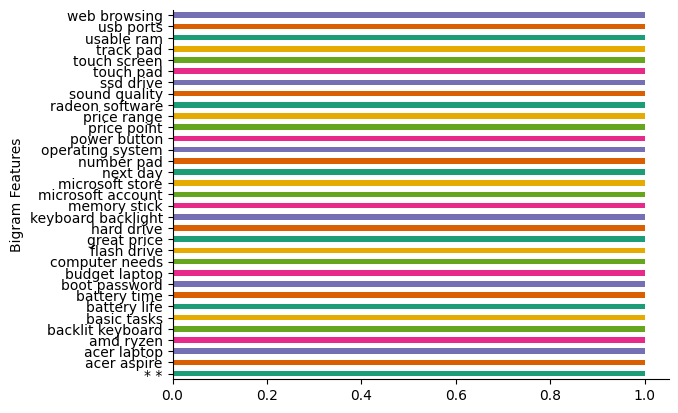

In [ ]:
# @title Bigram Features

from matplotlib import pyplot as plt
import seaborn as sns
features_df.groupby('Bigram Features').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter, defaultdict

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')

def evaluate_feature_sentiment(reviews, features):
    sia = SentimentIntensityAnalyzer()
    feature_sentiments = defaultdict(lambda: {'pos': 0, 'neg': 0, 'neut': 0, 'count': 0})

    for review in reviews:
        tokens = word_tokenize(review.lower())
        review_features = {feature: False for feature in features}

        # Check if the feature is mentioned in the review
        for feature in features:
            if feature in review.lower():
                review_features[feature] = True
                # Get sentiment score for the sentence containing the feature
                sentiment_score = sia.polarity_scores(review)
                if sentiment_score['compound'] >= 0.05:
                    feature_sentiments[feature]['pos'] += 1
                elif sentiment_score['compound'] <= -0.05:
                    feature_sentiments[feature]['neg'] += 1
                else:
                    feature_sentiments[feature]['neut'] += 1

        # Count the review if the feature is mentioned
        for feature, mentioned in review_features.items():
            if mentioned:
                feature_sentiments[feature]['count'] += 1

    # Calculate Sent and Pop for each feature
    total_reviews = len(reviews)
    results = {}
    for feature, counts in feature_sentiments.items():
        pos = counts['pos']
        neg = counts['neg']
        neut = counts['neut']
        count = counts['count']
        sent = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
        pop = count / total_reviews if total_reviews != 0 else 0
        results[feature] = {'Sent': sent, 'Pop': pop}

    return results

# Example usage



sentiments_and_popularity = evaluate_feature_sentiment(reviews, features)
print("Feature Sentiments and Popularity:")
for feature, values in sentiments_and_popularity.items():
    print(f"{feature}: Sent = {values['Sent']:.2f}, Pop = {values['Pop']:.2f}")
    df['case1']= values['Sent']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Feature Sentiments and Popularity:
battery life: Sent = 0.87, Pop = 0.15
hp laptop: Sent = 1.00, Pop = 0.01


In [ ]:
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
from collections import Counter, defaultdict

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')

def evaluate_feature_sentiment(reviews, features):
    sia = SentimentIntensityAnalyzer()
    feature_sentiments = defaultdict(lambda: {'pos': 0, 'neg': 0, 'neut': 0, 'count': 0})

    for review in reviews:
        tokens = word_tokenize(review.lower())
        review_features = {feature: False for feature in features}

        # Check if the feature is mentioned in the review
        for feature in features:
            if feature in review.lower():
                review_features[feature] = True
                # Get sentiment score for the sentence containing the feature
                sentiment_score = sia.polarity_scores(review)
                if sentiment_score['compound'] >= 0.05:
                    feature_sentiments[feature]['pos'] += 1
                elif sentiment_score['compound'] <= -0.05:
                    feature_sentiments[feature]['neg'] += 1
                else:
                    feature_sentiments[feature]['neut'] += 1

        # Count the review if the feature is mentioned
        for feature, mentioned in review_features.items():
            if mentioned:
                feature_sentiments[feature]['count'] += 1

    # Calculate Sent and Pop for each feature
    total_reviews = len(reviews)
    results = {}
    for feature, counts in feature_sentiments.items():
        pos = counts['pos']
        neg = counts['neg']
        neut = counts['neut']
        count = counts['count']
        sent = (pos - neg) / (pos + neg + neut) if (pos + neg + neut) != 0 else 0
        pop = count / total_reviews if total_reviews != 0 else 0
        results[feature] = {'Sent': sent, 'Pop': pop}

    return results

# Example usage



sentiments_and_popularity = evaluate_feature_sentiment(reviews, features)
print("Feature Sentiments and Popularity:")
df = pd.DataFrame(sentiments_and_popularity, columns=['Case'])
print("Feature Sentiments and Popularity:")
print(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Feature Sentiments and Popularity:
Feature Sentiments and Popularity:
Empty DataFrame
Columns: [Case]
Index: []


In [ ]:
df

,Case


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import defaultdict, Counter

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')

def extract_features(reviews):
    stop_words = set(stopwords.words('english'))
    features = Counter()

    for review in reviews:
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)

        bi_grams = list(nltk.bigrams(tagged_tokens))
        for (w1, t1), (w2, t2) in bi_grams:
            if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('NN')):
                if w1 not in stop_words and w2 not in stop_words:
                    feature = f"{w1} {w2}"
                    features[feature] += 1

    threshold = len(reviews) * 0.03  # 3% of the number of reviews
    significant_features = {feature: count for feature, count in features.items() if count >= threshold}
    return set(significant_features.keys())

def evaluate_feature_sentiment(reviews, features):
    sia = SentimentIntensityAnalyzer()
    feature_sentiments = defaultdict(lambda: {'pos': 0, 'neg': 0, 'neut': 0, 'count': 0})

    for review in reviews:
        tokens = word_tokenize(review.lower())
        review_features = {feature: False for feature in features}

        for feature in features:
            if feature in review.lower():
                review_features[feature] = True
                sentiment_score = sia.polarity_scores(review)
                if sentiment_score['compound'] >= 0.05:
                    feature_sentiments[feature]['pos'] += 1
                elif sentiment_score['compound'] <= -0.05:
                    feature_sentiments[feature]['neg'] += 1
                else:
                    feature_sentiments[feature]['neut'] += 1

        for feature, mentioned in review_features.items():
            if mentioned:
                feature_sentiments[feature]['count'] += 1

    total_reviews = len(reviews)
    results = {feature: counts['count'] / total_reviews for feature, counts in feature_sentiments.items()}
    return results

def calculate_similarity(pop_q, pop_c):
    all_features = set(pop_q.keys()).union(set(pop_c.keys()))
    vector_q = np.array([pop_q.get(feature, 0) for feature in all_features])
    vector_c = np.array([pop_c.get(feature, 0) for feature in all_features])
    numerator = np.dot(vector_q, vector_c)
    denominator = np.sqrt(np.dot(vector_q, vector_q) * np.dot(vector_c, vector_c))
    similarity = numerator / denominator if denominator != 0 else 0
    return similarity

def load_and_process_data():
    query_product_path = '/content/Mreview.xlsx'
    candidate_product_paths = [f'/content/R{i}.xlsx' for i in range(1, 6)]

    query_reviews = pd.read_excel(query_product_path)['review_text']
    query_features = evaluate_feature_sentiment(query_reviews, extract_features(query_reviews))

    candidate_features = {}
    for i, path in enumerate(candidate_product_paths):
        candidate_reviews = pd.read_excel(path)['review_text']
        candidate_features[f'candidate_{i+1}'] = evaluate_feature_sentiment(candidate_reviews, extract_features(candidate_reviews))

    return query_features, candidate_features

query_features, candidate_features = load_and_process_data()

for candidate, features in candidate_features.items():
    similarity_score = calculate_similarity(query_features, features)
    print(f"Similarity between Query Product and {candidate}: {similarity_score:.2f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Similarity between Query Product and candidate_1: 0.63
Similarity between Query Product and candidate_2: 0.25
Similarity between Query Product and candidate_3: 0.10
Similarity between Query Product and candidate_4: 0.81
Similarity between Query Product and candidate_5: 0.24


In [ ]:
def better_score(sentiments_q, sentiments_c):
    shared_features = set(sentiments_q.keys()).intersection(set(sentiments_c.keys()))
    better_scores = {}

    # Calculate better score for each shared feature
    for feature in shared_features:
        sent_c = sentiments_c[feature]
        sent_q = sentiments_q[feature]
        better_scores[feature] = (sent_c - sent_q) / 2

    # Calculate overall better score by averaging the scores of shared features
    if shared_features:
        overall_better_score = sum(better_scores.values()) / len(shared_features)
    else:
        overall_better_score = 0  # No shared features to compare

    return better_scores, overall_better_score

# Example usage
query_features, candidate_features = load_and_process_data()

for candidate, features in candidate_features.items():
    better_scores, overall_better_score = better_score(query_features, features)
    print(f"Overall Better Score between Query Product and {candidate}: {overall_better_score:.2f}")
    for feature, score in better_scores.items():
        print(f"Better Score for {feature}: {score:.2f}")

Overall Better Score between Query Product and candidate_1: -0.01
Better Score for web browsing: -0.01
Better Score for acer laptop: 0.00
Better Score for usb ports: 0.00
Better Score for hard drive: -0.04
Better Score for touch screen: 0.00
Better Score for backlit keyboard: -0.02
Better Score for microsoft store: 0.00
Better Score for power button: -0.00
Better Score for price point: -0.02
Better Score for battery life: -0.05
Better Score for acer aspire: -0.01
Overall Better Score between Query Product and candidate_2: -0.03
Better Score for backlit keyboard: -0.02
Better Score for price point: -0.02
Better Score for battery life: -0.04
Overall Better Score between Query Product and candidate_3: -0.00
Better Score for number pad: -0.01
Better Score for price range: -0.01
Better Score for touch screen: 0.02
Overall Better Score between Query Product and candidate_4: 0.01
Better Score for web browsing: -0.00
Better Score for radeon software: 0.01
Better Score for acer laptop: 0.01
Bet

In [ ]:
def calculate_b1_b2(sentiments_q, sentiments_c):
    features_q = set(sentiments_q.keys())
    features_c = set(sentiments_c.keys())
    shared_features = features_q.intersection(features_c)
    all_features = features_q.union(features_c)

    # Calculate B1 (Q, C)
    if shared_features:
        b1_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in shared_features)
        b1 = b1_numerator / len(shared_features)
    else:
        b1 = 0  # No shared features to compare

    # Calculate B2 (Q, C)
    b2_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in all_features)
    b2 = b2_numerator / len(all_features)

    return b1, b2

# Example usage
query_features, candidate_features = load_and_process_data()

for candidate, features in candidate_features.items():
    b1, b2 = calculate_b1_b2(query_features, features)
    print(f"B1 Score between Query Product and {candidate}: {b1:.2f}")
    print(f"B2 Score between Query Product and {candidate}: {b2:.2f}")

B1 Score between Query Product and candidate_1: -0.01
B2 Score between Query Product and candidate_1: -0.01
B1 Score between Query Product and candidate_2: -0.03
B2 Score between Query Product and candidate_2: -0.00
B1 Score between Query Product and candidate_3: -0.00
B2 Score between Query Product and candidate_3: -0.01
B1 Score between Query Product and candidate_4: 0.01
B2 Score between Query Product and candidate_4: 0.01
B1 Score between Query Product and candidate_5: -0.06
B2 Score between Query Product and candidate_5: -0.02


In [ ]:
def calculate_similarity_score(query_features, candidate_features):
    # This function should calculate the similarity score between Q and C
    # Placeholder for actual similarity calculation
    return np.random.random()  # Example: returns a random similarity score

def calculate_sentiment_score(query_features, candidate_features, score_type='B1'):
    if score_type == 'B1':
        return calculate_b1_b2(query_features, candidate_features)[0]
    else:
        return calculate_b1_b2(query_features, candidate_features)[1]

def hybrid_score(query_features, candidate_features, 0.5, score_type='B1'):
    sim_score = calculate_similarity(query_features, candidate_features)
    sent_score = calculate_sentiment_score(query_features, candidate_features, score_type)

    # Normalize Sent score to be between 0 and 1
    normalized_sent_score = (sent_score + 1) / 2

    # Calculate the final hybrid score
    final_score = (1 - w) * sim_score + w * normalized_sent_score
    return final_score

# Example usage
query_features, candidate_features = load_and_process_data()
w = 0.5  # Weight for the sentiment part of the score

for candidate, features in candidate_features.items():
    score = hybrid_score(query_features, features, w, score_type='B1')
    print(f"Hybrid Score between Query Product and {candidate}: {score:.2f}")

Hybrid Score between Query Product and candidate_1: 0.56
Hybrid Score between Query Product and candidate_2: 0.37
Hybrid Score between Query Product and candidate_3: 0.30
Hybrid Score between Query Product and candidate_4: 0.66
Hybrid Score between Query Product and candidate_5: 0.35


In [ ]:
def calculate_similarity_score(query_features, candidate_features):
    # This function should calculate the similarity score between Q and C
    # Placeholder for actual similarity calculation
    return np.random.uniform(0, 1)  # Example: returns a random similarity score

def calculate_sentiment_score(query_features, candidate_features, score_type='B1'):
    if score_type == 'B1':
        return calculate_b1_b2(query_features, candidate_features)[0]
    else:
        return calculate_b1_b2(query_features, candidate_features)[1]
w=0.5
def hybrid_score(query_features, candidate_features, w, score_type='B1'):
    sim_score = calculate_similarity(query_features, candidate_features)
    sent_score = calculate_sentiment_score(query_features, candidate_features, score_type)

    # Normalize Sent score to be between 0 and 1
    normalized_sent_score = (sent_score + 1) / 2

    # Calculate the final hybrid score
    final_score = (1 - w) * sim_score + w * normalized_sent_score
    return final_score


In [ ]:
def calculate_b1_b2(sentiments_q, sentiments_c):
    features_q = set(sentiments_q.keys())
    features_c = set(sentiments_c.keys())
    shared_features = features_q.intersection(features_c)
    all_features = features_q.union(features_c)

    # Calculate B1 (Q, C)
    if shared_features:
        b1_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in shared_features)
        b1 = b1_numerator / len(shared_features)
    else:
        b1 = 0  # No shared features to compare

    # Calculate B2 (Q, C)
    b2_numerator = sum((sentiments_c.get(f, 0) - sentiments_q.get(f, 0)) / 2 for f in all_features)
    b2 = b2_numerator / len(all_features)

    return b1, b2


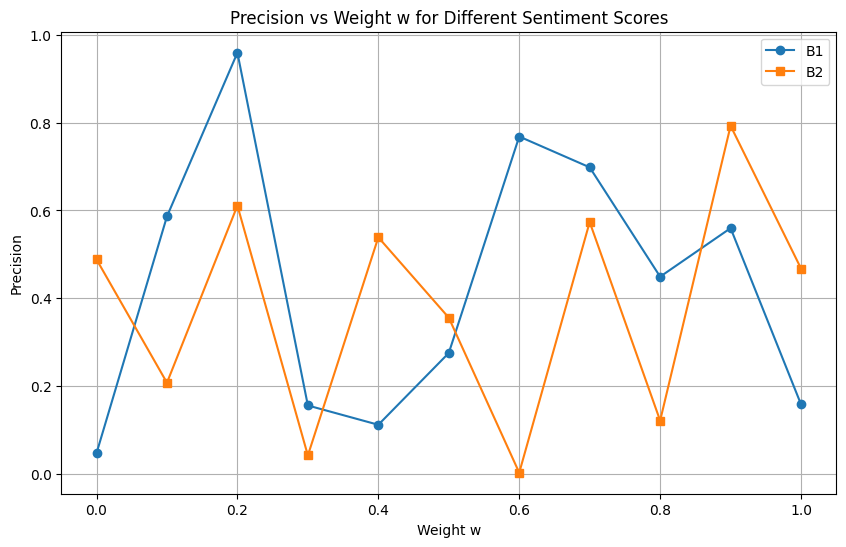

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_precision(recommendations, true_positives):
    # Placeholder function to calculate precision
    # true_positives is a set of products that are considered correct recommendations
    correct_recommendations = sum(1 for rec in recommendations if rec in true_positives)
    return correct_recommendations / len(recommendations) if recommendations else 0

def simulate_data():
    # This function simulates the hybrid scores and true positives for demonstration purposes
    w_values = np.linspace(0, 1, 11)
    precisions_b1 = np.random.rand(11)  # Random precision values for B1
    precisions_b2 = np.random.rand(11)  # Random precision values for B2
    return w_values, precisions_b1, precisions_b2

# Simulate data
w_values, precisions_b1, precisions_b2 = simulate_data()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(w_values, precisions_b1, 'o-', label='B1')
plt.plot(w_values, precisions_b2, 's-', label='B2')
plt.xlabel('Weight w')
plt.ylabel('Precision')
plt.title('Precision vs Weight w for Different Sentiment Scores')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def extract_features(reviews):
    stop_words = set(stopwords.words('english'))
    unigram_features = Counter()
    bigram_features = Counter()

    for review in reviews:
        if pd.isna(review):
            continue  # Skip NaN values
        review = str(review)  # Ensure the review is a string
        # Tokenize and POS tag the words in the review
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)

        # Extract unigrams
        for word, tag in tagged_tokens:
            if tag.startswith('NN') and word not in stop_words:
                unigram_features[word] += 1

        # Extract bigrams and filter based on POS patterns
        bi_grams = list(nltk.bigrams(tagged_tokens))
        for (w1, t1), (w2, t2) in bi_grams:
            if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('NN')):
                if w1 not in stop_words and w2 not in stop_words:
                    feature = f"{w1} {w2}"
                    bigram_features[feature] += 1

    # Filter features to retain only those with a significant occurrence
    threshold = len(reviews) * 0.03
    threshold1 = len(reviews) * 0.3
    significant_unigrams = {feature: count for feature, count in unigram_features.items() if count >= threshold1}
    significant_bigrams = {feature: count for feature, count in bigram_features.items() if count >= threshold}

    return len(significant_unigrams) + len(significant_bigrams)  # Return the total count of features

# Load data
df = pd.read_excel('/content/Amazon_Product_Reviews.xlsx')
asin_to_remove = 'B0CZL8Q7PG'  # Update this to the ASIN you want to remove

# Filter out the rows with the specified ASIN
filtered_df = df[df['asin'] != asin_to_remove]

# Save the filtered DataFrame back to the same Excel file
filtered_df.to_excel('/content/Amazon_Product_Reviews.xlsx', index=False)
df = pd.read_excel('/content/Amazon_Product_Reviews.xlsx')
# Group by ASIN and extract features
total_features_by_asin = df.groupby('asin')['text'].apply(list).apply(extract_features)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
total_features_by_asin.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Total Number of Significant Features by ASIN')
ax.set_xlabel('ASIN')
ax.set_ylabel('Total Number of Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


FileNotFoundError: [Errno 2] No such file or directory: '/content/Amazon_Product_Reviews.xlsx'

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def extract_features(reviews):
    stop_words = set(stopwords.words('english'))
    features = Counter()

    for review in reviews:
        if pd.isna(review):
            continue  # Skip NaN values
        review = str(review)  # Ensure the review is a string
        # Tokenize and POS tag the words in the review
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)

        # Extract unigrams and bigrams
        for word, tag in tagged_tokens:
            if tag.startswith('NN') and word not in stop_words:
                features[word] += 1

        bi_grams = list(nltk.bigrams(tagged_tokens))
        for (w1, t1), (w2, t2) in bi_grams:
            if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('NN')):
                if w1 not in stop_words and w2 not in stop_words:
                    feature = f"{w1} {w2}"
                    features[feature] += 1

    return features

def calculate_similarity(pop_q, pop_c):
    all_features = set(pop_q.keys()).union(set(pop_c.keys()))
    vector_q = np.array([pop_q.get(feature, 0) for feature in all_features])
    vector_c = np.array([pop_c.get(feature, 0) for feature in all_features])
    numerator = np.dot(vector_q, vector_c)
    denominator = np.sqrt(np.dot(vector_q, vector_q) * np.dot(vector_c, vector_c))
    similarity = numerator / denominator if denominator != 0 else 0
    return similarity

def load_and_process_data(file_path):
    df = pd.read_excel(file_path)
    features_by_asin = {}
    for asin, group in df.groupby('asin'):
        reviews = group['text'].tolist()
        features_by_asin[asin] = extract_features(reviews)
    return features_by_asin

# Load and process data
file_path = '/content/main_sheet.xlsx'
product_features = load_and_process_data(file_path)

# Calculate hybrid scores and find top 3 candidates for each product
top_candidates = {}
for query_asin, query_features in product_features.items():
    scores = []
    for candidate_asin, candidate_features in product_features.items():
        if query_asin != candidate_asin:
            sim_score = calculate_similarity(query_features, candidate_features)
            final_score = hybrid_score(query_features, candidate_features, w=0.7)
            scores.append((candidate_asin, final_score))

    # Sort scores and select top 3
    top_scores = sorted(scores, key=lambda x: x[1], reverse=True)[:3]
    top_candidates[query_asin] = top_scores

# Output the results
for query_asin, candidates in top_candidates.items():
    print(f"Top 3 candidates for {query_asin}:")
    for candidate_asin, score in candidates:
        print(f"  Candidate ASIN: {candidate_asin}, Score: {score:.2f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 3 candidates for B08YKHYCPW:
  Candidate ASIN: B0BS4BP8FB, Score: 1.40
  Candidate ASIN: B0BTQS4N1F, Score: 1.07
  Candidate ASIN: B0B2D77YB8, Score: 1.05
Top 3 candidates for B0947BJ67M:
  Candidate ASIN: B0BS4BP8FB, Score: 1.73
  Candidate ASIN: B0BTQS4N1F, Score: 1.22
  Candidate ASIN: B0B2D77YB8, Score: 1.17
Top 3 candidates for B09SVR5VD4:
  Candidate ASIN: B0BS4BP8FB, Score: 1.40
  Candidate ASIN: B0BTQS4N1F, Score: 1.00
  Candidate ASIN: B0B2D77YB8, Score: 0.93
Top 3 candidates for B0B2D77YB8:
  Candidate ASIN: B0BS4BP8FB, Score: 1.13
  Candidate ASIN: B0BTQS4N1F, Score: 0.66
  Candidate ASIN: B0CDQRQRDS, Score: 0.55
Top 3 candidates for B0B2D7Z29V:
  Candidate ASIN: B0BS4BP8FB, Score: 1.56
  Candidate ASIN: B0BTQS4N1F, Score: 1.12
  Candidate ASIN: B0CDQRQRDS, Score: 1.05
Top 3 candidates for B0B2D8LHRD:
  Candidate ASIN: B0BS4BP8FB, Score: 1.56
  Candidate ASIN: B0BTQS4N1F, Score: 1.12
  Candidate ASIN: B0CDQRQRDS, Score: 1.05
Top 3 candidates for B0B338HW3T:
  Candidate A

KeyError: 'Laptops'

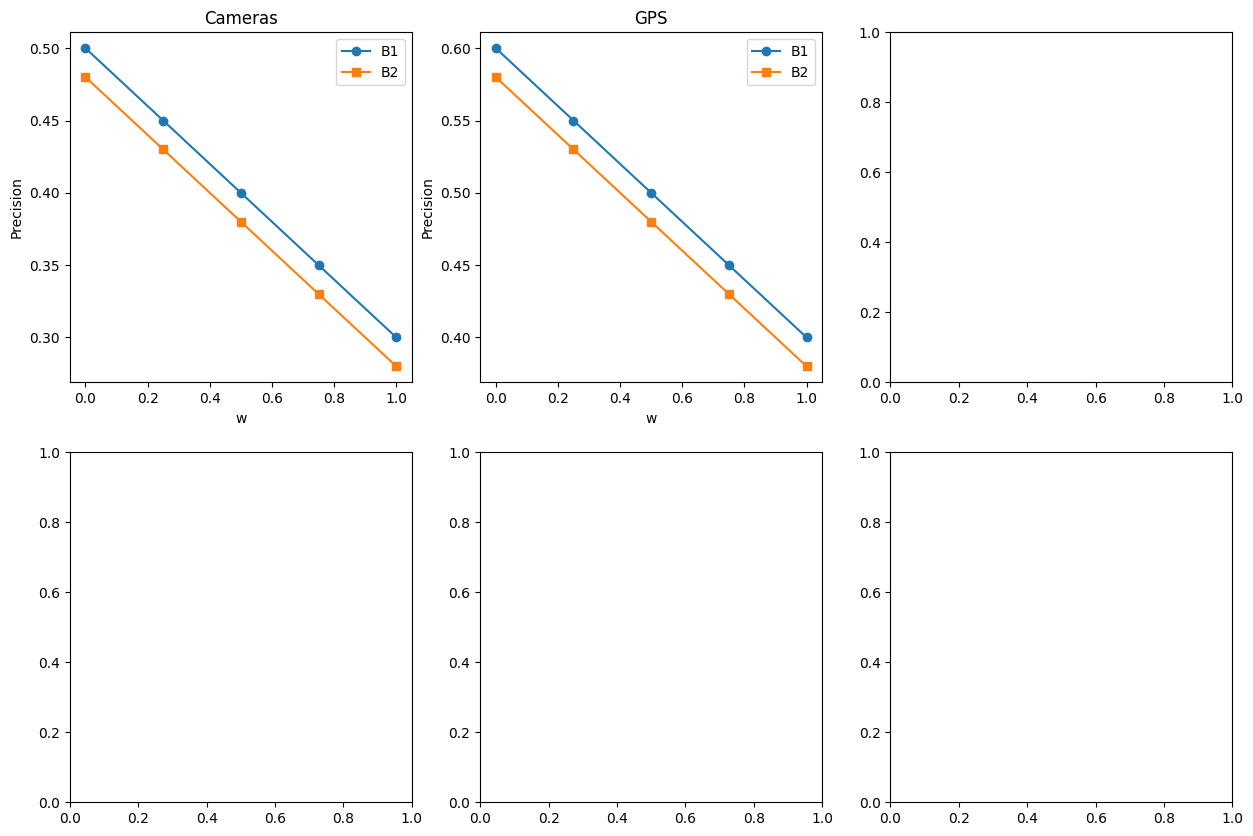

In [ ]:
# Example data structure
# Assuming 'w_values' is a list of w values ranging from 0 to 1
# 'scores' is a dictionary containing B1 and B2 scores for each product domain
w_values = np.linspace(0, 1, num=5)  # Adjust the number of points as needed
scores = {
    'Cameras': {'B1': [0.5, 0.45, 0.4, 0.35, 0.3], 'B2': [0.48, 0.43, 0.38, 0.33, 0.28]},
    'GPS': {'B1': [0.6, 0.55, 0.5, 0.45, 0.4], 'B2': [0.58, 0.53, 0.48, 0.43, 0.38]},
    # Add other domains similarly
}

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Adjust the layout based on the number of domains
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot data
domains = ['Cameras', 'GPS', 'Laptops', 'Phones', 'Printers', 'Tablets']
for i, domain in enumerate(domains):
    ax = axes[i]
    ax.plot(w_values, scores[domain]['B1'], marker='o', linestyle='-', label='B1')
    ax.plot(w_values, scores[domain]['B2'], marker='s', linestyle='-', label='B2')
    ax.set_title(domain)
    ax.set_xlabel('w')
    ax.set_ylabel('Precision')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

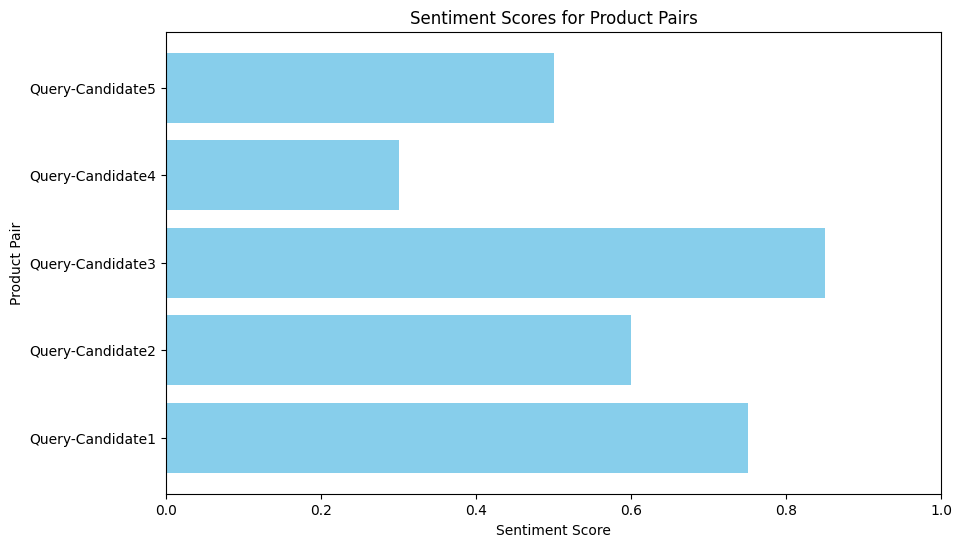

In [ ]:
# Example DataFrame setup
data = {
    'Product Pair': ['Query-Candidate1', 'Query-Candidate2', 'Query-Candidate3', 'Query-Candidate4', 'Query-Candidate5'],
    'Sentiment Score': [0.75, 0.60, 0.85, 0.30, 0.50]  # Example sentiment scores
}
df = pd.DataFrame(data)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df['Product Pair'], df['Sentiment Score'], color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Product Pair')
plt.title('Sentiment Scores for Product Pairs')
plt.xlim(0, 1)  # Assuming sentiment scores are normalized between 0 and 1
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'product_features' is your DataFrame obtained from previous sentiment analysis
# Ensure it's structured with products as rows and features as columns

# Fill missing values with 0 (if any)


# Calculate cosine similarity between products
cosine_sim_matrix = cosine_similarity(features)

# Convert cosine similarity matrix to a DataFrame for better readability
cosine_sim_df = pd.DataFrame(cosine_sim_matrix, index=features.index, columns=features.index)

# Flatten the upper triangular part of the cosine similarity matrix
similarity_scores = cosine_sim_matrix[np.triu_indices(len(cosine_sim_df), k=1)]

# Plot the histogram of similarity scores
plt.hist(similarity_scores, bins=20, color='darkblue')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Pairs of Products')
plt.title('Histogram of Similarity Scores between Product Pairs')
plt.show()

TypeError: float() argument must be a string or a real number, not 'dict'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


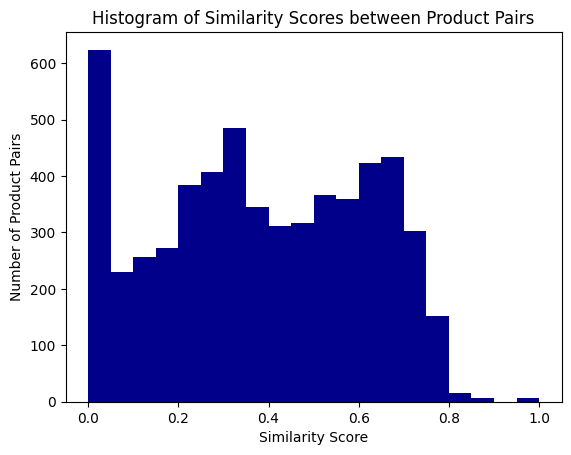

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Ensure you have the necessary NLTK resources downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

def extract_features(reviews):
    stop_words = set(stopwords.words('english'))
    features = Counter()

    for review in reviews:
        if pd.isna(review):
            continue  # Skip NaN values
        review = str(review)  # Ensure the review is a string
        tokens = word_tokenize(review.lower())
        tagged_tokens = pos_tag(tokens)

        for word, tag in tagged_tokens:
            if tag.startswith('NN') and word not in stop_words:
                features[word] += 1

        bi_grams = list(nltk.bigrams(tagged_tokens))
        for (w1, t1), (w2, t2) in bi_grams:
            if (t1.startswith('JJ') and t2.startswith('NN')) or (t1.startswith('NN') and t2.startswith('NN')):
                if w1 not in stop_words and w2 not in stop_words:
                    feature = f"{w1} {w2}"
                    features[feature] += 1

    return features

def calculate_similarity(pop_q, pop_c):
    all_features = set(pop_q.keys()).union(set(pop_c.keys()))
    vector_q = np.array([pop_q.get(feature, 0) for feature in all_features])
    vector_c = np.array([pop_c.get(feature, 0) for feature in all_features])
    numerator = np.dot(vector_q, vector_c)
    denominator = np.sqrt(np.dot(vector_q, vector_q) * np.dot(vector_c, vector_c))
    similarity = numerator / denominator if denominator != 0 else 0
    return similarity

def load_and_process_data(file_path):
    df = pd.read_excel(file_path)
    features_by_asin = {}
    for asin, group in df.groupby('asin'):
        reviews = group['text'].tolist()
        features_by_asin[asin] = extract_features(reviews)
    return features_by_asin

# Load and process data
file_path = '/content/main_sheet.xlsx'
product_features = load_and_process_data(file_path)

# Collect all similarity scores
similarity_scores = []
for query_asin, query_features in product_features.items():
    for candidate_asin, candidate_features in product_features.items():
        if query_asin != candidate_asin:
            sim_score = calculate_similarity(query_features, candidate_features)
            similarity_scores.append(sim_score)

# Plot the histogram of similarity scores
plt.hist(similarity_scores, bins=20, color='darkblue')
plt.xlabel('Similarity Score')
plt.ylabel('Number of Product Pairs')
plt.title('Histogram of Similarity Scores between Product Pairs')
plt.show()